# Accuracy plots

#### Spectrograms generated by LOCUST. Track analysis by KATYDID and Local Hough Transform. 

#### Then, a comparison between the two algorithms based on their accuracy.

In [1]:
import LocustFakeEvent
import h5py
import uproot
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import matplotlib.image as mpimg 
import math
import time
import sklearn
import scipy

In [25]:
working_dir = '../Locust_out'
katydid_config = '../Katydid_LOCUST_may_2019_config.yaml'
locust_config = '../LocustFakeTrack_distribution_choices.json'
sim_name = 'test_fake_event'
snr=2.0
min_snr=snr
N=4096
SR=100e6
dt = 1.0/SR

In [3]:
pi=math.pi
tan=math.tan
cos=math.cos
sin=math.sin
exp=math.exp
sqrt=math.sqrt

In [4]:
pixel_threshold=1
angle_dim=20
window_size=7
n_std=0
th_consecutive=3
max_spacing=5

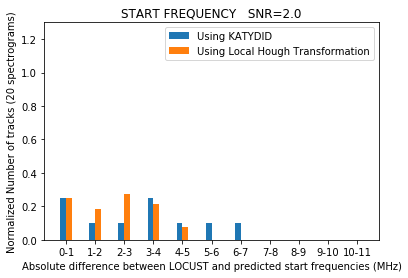

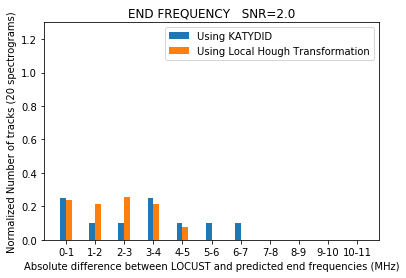

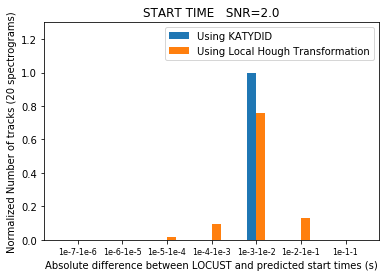

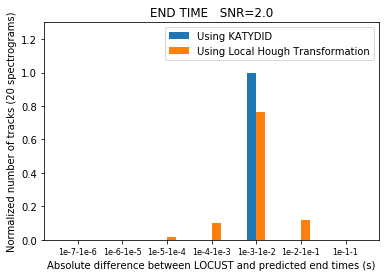

Time in minutes: 12.111590512593587


In [26]:
start = time.time()
fig=20
diff_start_freq_katy=[]
diff_end_freq_katy=[]
diff_start_time_katy=[]
diff_end_time_katy=[]
diff_start_freq_hough=[]
diff_end_freq_hough=[]
diff_start_time_hough=[]
diff_end_time_hough=[]
pos_time=0
pos_freq=0

for n in range(fig):
    img, frequencies, true_events = LocustFakeEvent.run_simulation(working_dir=working_dir, 
                                                                            sim_name=sim_name, 
                                                                            locust_config_path=locust_config, 
                                                                            snr=snr, 
                                                                            min_snr=min_snr, 
                                                                            N=N, SR=SR, fixed_snr=False)
    
    katydid_events = LocustFakeEvent.run_analysis(working_dir, sim_name, katydid_config)
    
    for i in range(len(katydid_events)):
        diff_min_freq= abs(true_events[0][0]['start_freq']-katydid_events[i]['start_freq'])
        diff_min_time= abs(true_events[0][0]['start_time']-katydid_events[i]['start_time'])
        
        for j in range(1,len(true_events[0])):
            diff_freq=abs(true_events[0][j]['start_freq']-katydid_events[i]['start_freq'])
            diff_time=abs(true_events[0][j]['start_time']-katydid_events[i]['start_time'])
            if(diff_freq<diff_min_freq and diff_time<diff_min_time):
                pos_freq=j
                pos_time=j
                diff_min_freq=diff_freq
                diff_min_time=diff_time
        
        if(pos_time==pos_freq):
            if(0<=diff_min_freq<10**6):
                diff_start_freq_katy.append(1)
            if(10**6<=diff_min_freq<2*10**6):
                diff_start_freq_katy.append(3)
            if(2*10**6<=diff_min_freq<3*10**6):  
                diff_start_freq_katy.append(5)
            if(3*10**6<=diff_min_freq<4*10**6):
                diff_start_freq_katy.append(7)
            if(4*10**6<=diff_min_freq<5*10**6):
                diff_start_freq_katy.append(9)
            if(5*10**6<=diff_min_freq<6*10**6):
                diff_start_freq_katy.append(11)
            if(6*10**6<=diff_min_freq<7*10**6):
                diff_start_freq_katy.append(13)
            if(7*10**6<=diff_min_freq<8*10**6):
                diff_start_freq_katy.append(15)   
            if(8*10**6<=diff_min_freq<9*10**6):
                diff_start_freq_katy.append(17)  
            if(9*10**6<=diff_min_freq<10**7):
                diff_start_freq_katy.append(19) 
                
            if(10**-7<=diff_min_time<10**-6):
                diff_start_time_katy.append(1)
            if(10**-6<=diff_min_time<10**-5):
                diff_start_time_katy.append(3)
            if(10**-5<=diff_min_time<10**-4):  
                diff_start_time_katy.append(5)
            if(10**-4<=diff_min_time<10**-3):
                diff_start_time_katy.append(7)
            if(10**-3<=diff_min_time<10**-2):
                diff_start_time_katy.append(9)
            if(10**-2<=diff_min_time<10**-1):
                diff_start_time_katy.append(11) 
            if(10**-1<=diff_min_time<1):
                diff_start_time_katy.append(13)     

    for i in range(len(katydid_events)):
        diff_min_freq= abs(true_events[0][0]['end_freq']-katydid_events[i]['end_freq'])
        diff_min_time= abs(true_events[0][0]['end_time']-katydid_events[i]['end_time'])
        for j in range(1,len(true_events[0])):
            diff_freq=abs(true_events[0][j]['end_freq']-katydid_events[i]['end_freq'])
            diff_time=abs(true_events[0][j]['end_time']-katydid_events[i]['end_time'])
            if(diff_freq<diff_min_freq and diff_time<diff_min_time):
                pos_freq=j
                pos_time=j
                diff_min_freq=diff_freq
                diff_min_time=diff_time
            
        if(pos_time==pos_freq):
            if(0<=diff_min_freq<10**6):
                diff_end_freq_katy.append(1)
            if(10**6<=diff_min_freq<2*10**6):
                diff_end_freq_katy.append(3)
            if(2*10**6<=diff_min_freq<3*10**6):  
                diff_end_freq_katy.append(5)
            if(3*10**6<=diff_min_freq<4*10**6):
                diff_end_freq_katy.append(7)
            if(4*10**6<=diff_min_freq<5*10**6):
                diff_end_freq_katy.append(9)
            if(5*10**6<=diff_min_freq<6*10**6):
                diff_end_freq_katy.append(11)
            if(6*10**6<=diff_min_freq<7*10**6):
                diff_end_freq_katy.append(13)
            if(7*10**6<=diff_min_freq<8*10**6):
                diff_end_freq_katy.append(15)   
            if(8*10**6<=diff_min_freq<9*10**6):
                diff_end_freq_katy.append(17)  
            if(9*10**6<=diff_min_freq<10**7):
                diff_end_freq_katy.append(19)   
                
            if(10**-7<=diff_min_time<10**-6):
                diff_end_time_katy.append(1)
            if(10**-6<=diff_min_time<10**-5):
                diff_end_time_katy.append(3)
            if(10**-5<=diff_min_time<10**-4):  
                diff_end_time_katy.append(5)
            if(10**-4<=diff_min_time<10**-3):
                diff_end_time_katy.append(7)
            if(10**-3<=diff_min_time<10**-2):
                diff_end_time_katy.append(9)
            if(10**-2<=diff_min_time<10**-1):
                diff_end_time_katy.append(11)       
            if(10**-1<=diff_min_time<1):
                diff_end_time_katy.append(13)
                
    binary_final = local_hough_track_reconstruction(img, window_size, angle_dim, pixel_threshold, n_std,th_consecutive,max_spacing)
    start_x,start_y,end_x,end_y=get_track_stats(binary_final,window_size)
    spec_final=get_spec_final(binary_final,img)
                
    for i in range(len(start_x)):
        diff_min_freq= abs(true_events[0][0]['start_freq']-abs((frequencies[start_y[i]]/(2*pi))+2.59*10**10))
        diff_min_time= abs(true_events[0][0]['start_time']-(N/SR)*start_x[i])
        for j in range(1,len(true_events[0])):
            diff_freq=abs(true_events[0][j]['start_freq']-abs((frequencies[start_y[i]]/(2*pi))+2.59*10**10))
            diff_time=abs(true_events[0][j]['start_time']-(N/SR)*start_x[i])
            if(diff_freq<diff_min_freq and diff_time<diff_min_time):
                pos_freq=j
                pos_time=j
                diff_min_freq=diff_freq
                diff_min_time=diff_time
                
        if(pos_time==pos_freq):
            if(0<=diff_min_freq<10**6):
                diff_start_freq_hough.append(1)
            if(10**6<=diff_min_freq<2*10**6):
                diff_start_freq_hough.append(3)
            if(2*10**6<=diff_min_freq<3*10**6):  
                diff_start_freq_hough.append(5)
            if(3*10**6<=diff_min_freq<4*10**6):
                diff_start_freq_hough.append(7)
            if(4*10**6<=diff_min_freq<5*10**6):
                diff_start_freq_hough.append(9)
            if(5*10**6<=diff_min_freq<6*10**6):
                diff_start_freq_hough.append(11)
            if(6*10**6<=diff_min_freq<7*10**6):
                diff_start_freq_hough.append(13)
            if(7*10**6<=diff_min_freq<8*10**6):
                diff_start_freq_hough.append(15)   
            if(8*10**6<=diff_min_freq<9*10**6):
                diff_start_freq_hough.append(17)  
            if(9*10**6<=diff_min_freq<10**7):
                diff_start_freq_hough.append(19) 
                
            if(10**-7<=diff_min_time<10**-6):
                diff_start_time_hough.append(1)
            if(10**-6<=diff_min_time<10**-5):
                diff_start_time_hough.append(3)
            if(10**-5<=diff_min_time<10**-4):  
                diff_start_time_hough.append(5)
            if(10**-4<=diff_min_time<10**-3):
                diff_start_time_hough.append(7)
            if(10**-3<=diff_min_time<10**-2):
                diff_start_time_hough.append(9)
            if(10**-2<=diff_min_time<10**-1):
                diff_start_time_hough.append(11) 
            if(10**-1<=diff_min_time<1):
                diff_start_time_hough.append(13)     

    for i in range(len(start_x)):
        diff_min_freq=abs(true_events[0][0]['end_freq']-abs((frequencies[end_y[i]]/(2*pi))+2.59*10**10))
        diff_min_time=abs(true_events[0][0]['end_time']-(N/SR)*end_x[i])
        for j in range(1,len(true_events[0])):
            diff_freq=abs(true_events[0][j]['end_freq']-abs((frequencies[end_y[i]]/(2*pi))+2.59*10**10))
            diff_time=abs(true_events[0][j]['end_time']-(N/SR)*end_x[i])
            if(diff_freq<diff_min_freq and diff_time<diff_min_time):
                pos_freq=j
                pos_time=j
                diff_min_freq=diff_freq
                diff_min_time=diff_time

        if(pos_time==pos_freq):
            if(0<=diff_min_freq<10**6):
                diff_end_freq_hough.append(1)
            if(10**6<=diff_min_freq<2*10**6):
                diff_end_freq_hough.append(3)
            if(2*10**6<=diff_min_freq<3*10**6):  
                diff_end_freq_hough.append(5)
            if(3*10**6<=diff_min_freq<4*10**6):
                diff_end_freq_hough.append(7)
            if(4*10**6<=diff_min_freq<5*10**6):
                diff_end_freq_hough.append(9)
            if(5*10**6<=diff_min_freq<6*10**6):
                diff_end_freq_hough.append(11)
            if(6*10**6<=diff_min_freq<7*10**6):
                diff_end_freq_hough.append(13)
            if(7*10**6<=diff_min_freq<8*10**6):
                diff_end_freq_hough.append(15)   
            if(8*10**6<=diff_min_freq<9*10**6):
                diff_end_freq_hough.append(17)  
            if(9*10**6<=diff_min_freq<10**7):
                diff_end_freq_hough.append(19)   
                
            if(10**-7<=diff_min_time<10**-6):
                diff_end_time_hough.append(1)
            if(10**-6<=diff_min_time<10**-5):
                diff_end_time_hough.append(3)
            if(10**-5<=diff_min_time<10**-4):  
                diff_end_time_hough.append(5)
            if(10**-4<=diff_min_time<10**-3):
                diff_end_time_hough.append(7)
            if(10**-3<=diff_min_time<10**-2):
                diff_end_time_hough.append(9)
            if(10**-2<=diff_min_time<10**-1):
                diff_end_time_hough.append(11)       
            if(10**-1<=diff_min_time<1):
                diff_end_time_hough.append(13)  

plt.hist([diff_start_freq_katy,diff_start_freq_hough],density=1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],label=['Using KATYDID','Using Local Hough Transformation'])
x = np.array([1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5])
my_xticks = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11']
plt.xticks(x,my_xticks,fontsize=10)
plt.xlim(0,23,1)
plt.ylim(0,1.3)
plt.xlabel("Absolute difference between LOCUST and predicted start frequencies (MHz)")
plt.ylabel("Normalized Number of tracks (20 spectrograms)")
plt.title("START FREQUENCY   SNR=2.0")
plt.legend(loc='upper right')
plt.show()

plt.hist([diff_end_freq_katy,diff_end_freq_hough],density=1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],label=['Using KATYDID','Using Local Hough Transformation'])
x = np.array([1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5])
my_xticks = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11']
plt.xticks(x,my_xticks,fontsize=10)
plt.xlim(0,23,1)
plt.ylim(0,1.3)
plt.xlabel("Absolute difference between LOCUST and predicted end frequencies (MHz)")
plt.ylabel("Normalized Number of tracks (20 spectrograms)")
plt.title("END FREQUENCY   SNR=2.0")
plt.legend(loc='upper right')
plt.show()

plt.hist([diff_start_time_katy,diff_start_time_hough],density=1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],label=['Using KATYDID','Using Local Hough Transformation'])
x = np.array([1.5,3.5,5.5,7.5,9.5,11.5,13.5])
my_xticks = ['1e-7-1e-6','1e-6-1e-5','1e-5-1e-4','1e-4-1e-3','1e-3-1e-2','1e-2-1e-1','1e-1-1']
plt.xticks(x,my_xticks,fontsize=8)
plt.xlim(0,15,1)
plt.ylim(0,1.3)
plt.xlabel("Absolute difference between LOCUST and predicted start times (s)")
plt.ylabel("Normalized Number of tracks (20 spectrograms)")
plt.title("START TIME   SNR=2.0")
plt.legend(loc='upper right')
plt.show()

plt.hist([diff_end_time_katy,diff_end_time_hough],density=1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],label=['Using KATYDID','Using Local Hough Transformation'])
x = np.array([1.5,3.5,5.5,7.5,9.5,11.5,13.5])
my_xticks = ['1e-7-1e-6','1e-6-1e-5','1e-5-1e-4','1e-4-1e-3','1e-3-1e-2','1e-2-1e-1','1e-1-1']
plt.xticks(x,my_xticks,fontsize=8)
plt.xlim(0,15,1)
plt.ylim(0,1.3)
plt.xlabel("Absolute difference between LOCUST and predicted end times (s)")
plt.ylabel("Normalized number of tracks (20 spectrograms)")
plt.title("END TIME   SNR=2.0")
plt.legend(loc='upper right')
plt.show()

end = time.time()
print("Time in minutes:",(end-start)/60)

In [5]:
def get_spec_final(binary_final,img):
    spec_final=np.zeros(shape=(img.shape[0],img.shape[1]))
    for i in range(binary_final.shape[0]):
        for j in range(binary_final.shape[1]):
            if(binary_final[i,j]==True):
                spec_final[i,j]=img[i,j]
    return spec_final

In [6]:
def get_best_fit(window):
    x_pts=[]
    y_pts=[]
    num=0
    den=0
    sum=0
    y_int=0
    mean_x=0
    mean_y=0
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if(window[i,j]>0):
                x_pts.append(i)
                y_pts.append(j)
                
    if(len(x_pts)==0 or len(y_pts)==0):
        return -1,-1  
    else:
        mean_x=np.mean(x_pts)
        mean_y=np.mean(y_pts)
    
        for i in range(len(x_pts)):
            sum=sum+window[x_pts[i],y_pts[i]]
        I_avg=sum/len(x_pts)
        
        for n in range(len(x_pts)):
            num=num+(window[x_pts[n],y_pts[n]]**2)*(x_pts[n]-mean_x)*(y_pts[n]-mean_y)
        for n in range(len(x_pts)):
            den=den+(window[x_pts[n],y_pts[n]]**2)*(y_pts[n]-mean_y)**2
        slope=num/den
    
        y_int=mean_y-(slope*mean_x)
        return slope,y_int

In [7]:
def local_hough_track_reconstruction(img, window_size, angle_dim, pixel_threshold, n_std,th_consecutive,max_spacing):

    width = int(window_size/2)

    binary_img = get_binary_img(img,n_std)
    binary_final = np.zeros(shape=binary_img.shape, dtype=bool)
    
    angles = np.linspace(-np.pi/2,0,angle_dim)

    ind = get_window_centers(binary_img, width)
    
    x = np.arange(-width, width+1, 1)
    y = np.arange(-width, width+1, 1)
    xx, yy = np.meshgrid(x,y)

    for k in range(ind.shape[0]):

        i=ind[k,0]
        j=ind[k,1]

        x_min = i-width
        x_max = i+width+1
        y_min = j-width
        y_max = j+width+1
    
        window = binary_img[x_min:x_max,y_min:y_max]
        
        binary_result = get_voting(binary_img, xx, yy, window, angles)

        local_result = get_local_result(binary_result,pixel_threshold)
        
        points_x,points_y,count=get_coordinates(local_result)
        
        local_result_final=get_local_result_final(local_result,points_x,points_y,count,th_consecutive,max_spacing,width)

        binary_final[x_min:x_max,y_min:y_max] = binary_final[x_min:x_max,y_min:y_max]|local_result
    
    return binary_final

In [8]:
def get_voting(img, xx, yy, window, angles):
    
    result=xx*np.cos(angles[:,None,None])+yy*np.sin(angles[:,None,None])

    voting_matrix = np.zeros(shape=result.shape, dtype=bool)
    
    bool_mask = window[None,:,:]&(np.abs(result)<0.5)

    voting_matrix[bool_mask]=1
    
    return voting_matrix

In [9]:
def get_local_result(binary_result, pixel_threshold):
    
    hist = np.sum(binary_result,axis=(1,2))
    #plt.plot(hist)
    #plt.show()
    result_angles = hist>pixel_threshold

    return np.any(binary_result[result_angles],axis=0)

In [10]:
def get_window_centers(binary_img, width):
    ind = np.argwhere(binary_img)
    ind_c=(ind[:,0]>=width)&(ind[:,0]<binary_img.shape[0]-width)&\
            (ind[:,1]>=width)&(ind[:,1]<binary_img.shape[1]-width)
    ind = ind[ind_c]
    return ind

In [11]:
def get_binary_img(img,n_std):
    threshold = np.mean(img)+np.std(img)
    binary_img = img>threshold
    return binary_img

In [12]:
def get_coordinates(local_result):
    
    max_points=10*local_result.shape[0]
    theta_dim=90
    x=int(local_result.shape[0]/2)
    y=int(local_result.shape[1]/2)
    points_x=np.zeros(shape=(theta_dim,max_points),dtype='int')
    points_y=np.zeros(shape=(theta_dim,max_points),dtype='int')
    count=np.zeros(shape=(theta_dim),dtype='int')
    
    for i in range(0,local_result.shape[0]):
        for j in range(0,local_result.shape[1]):
            for itheta in range(0,theta_dim,angle_dim):
                theta=(np.pi/180)*itheta
                result=(i-x)*np.cos(theta)+(j-y)*np.sin(theta)
                if (abs(result)<=0.5 and local_result[i,j]==True):
                    points_x[itheta,count[itheta]]=i
                    points_y[itheta,count[itheta]]=j
                    count[itheta]=count[itheta]+1
                    
    return points_x,points_y,count

In [13]:
def get_local_result_final(local_result,points_x,points_y,count,th_consecutive,max_spacing,size):

    theta_dim=90
    
    local_result_final=np.zeros(shape=(local_result.shape[0],local_result.shape[1]),dtype=bool)
    
    max_points=np.max(points_x)
    for itheta in range(theta_dim):
        points_x[itheta].sort()
        points_y[itheta].sort()
        label_min_x=0
        label_max_x=0
        label_max_x,label_min_x=is_continuous(points_x[itheta],max_points,max_spacing)
        if(label_max_x-label_min_x>=th_consecutive):
            for icount in range(label_min_x+1,label_max_x):
                delta_x=points_x[itheta,icount]-points_x[itheta,icount-1]
                delta_y=points_y[itheta,icount]-points_x[itheta,icount-1]
                
                if(delta_x==0 and delta_y==0):
                    local_result_final[points_x[itheta,icount-1]+size,points_y[itheta,icount-1]+size]=True 
                
                elif(delta_x>0 and delta_y==0):
                    for i in range(0,delta_x+1):
                        local_result_final[points_x[itheta,icount-1]+size+i,points_y[itheta,icount-1]+size]=True
                        
                elif(delta_x==0 and delta_y>0):
                    for i in range(0,delta_y+1):
                        local_result_final[points_x[itheta,icount-1]+size,points_y[itheta,icount-1]+size+i]=True
                        
                elif(delta_x>0 and delta_y>0):
                    slope=np.tan(delta_y/delta_x)
                    for i in range(0,delta_x+1):
                        local_result_final[points_x[itheta,icount-1]+size+i,points_y[itheta,icount-1]+size+int(i*slope)]=True
                                   
                
    return local_result_final

In [14]:
def is_continuous(coord_x,max_points,max_spacing):
    start=0
    
    if(np.sum(coord_x)>0):
        while(coord_x[start]==0):
            start=start+1
        
    label_min_x=start
    label_max_x=start+1 
    index_lower_x=label_min_x
    index_upper_x=label_max_x
    while(index_upper_x<max_points):
        if(coord_x[index_upper_x]-coord_x[index_upper_x-1]<=max_spacing): #or coord_x[index_upper_x]-coord_x[index_upper_x-1]==1 or coord_x[index_upper_x]-coord_x[index_upper_x-1]==2):
            if(index_upper_x-index_lower_x>label_max_x-label_min_x):
                label_min_x=index_lower_x
                label_max_x=index_upper_x-1
            index_upper_x=index_upper_x+1
            continue
        
        index_lower_x=index_lower_x+1
        index_upper_x=index_lower_x+1
    
    return label_max_x,label_min_x

In [15]:
def get_track_stats(binary_final,size):
    start_x=[]
    start_y=[]
    end_x=[]
    end_y=[]
    slope=[]
    vacant_row=1
    y=-1
    x=0
    x_ref=0
    while(y<binary_final.shape[1]-1):
        y=y+1
        track_pixel=0
        sum=np.sum(binary_final[:,y])
        if(sum>0):
            for x in range(int(size/2),binary_final.shape[0]-int(size/2)): #This is for checking the starting pixel coordinates of a track
                if(binary_final[x,y]==True):
                    window_sum=np.sum(binary_final[x-int(size/2):x+int(size/2),y-int(size/2):y+int(size/2)])
                    if(window_sum>=9):
                        track_pixel=1
                        start_x.append(x)
                        start_y.append(y)
                        break
                    else:
                        track_pixel=0
       # print(y)
        if(track_pixel==1):
            vacant_row_total=0
            while(y<binary_final.shape[0]-1):
                y=y+1
                if(np.sum(binary_final[:,y])>0):
                    for x in range(int(size/2),binary_final.shape[0]-int(size/2)): #This is for checking the ending pixel coordinates of a track
                    
                        if(binary_final[x,y]==True):
                            window_sum=np.sum(binary_final[x-int(size/2):x+int(size/2),y-int(size/2):y+int(size/2)])
                            #print("Window",window_sum)
                            if(window_sum>=9):
                                vacant_row=0  #This means that the bright pixels in a row are actually track pixels
                                x_ref=x
                                break
                            else:
                                vacant_row=1  #This means that the bright pixels in a row are actually noise
                #print(vacant_row)
                if(np.sum(binary_final[:,y])==0 or vacant_row==1):
                    vacant_row_total=vacant_row_total+1
                    vacant_row=1
                
                if(vacant_row_total==2):
                    #print(y-2)
                    end_y.append(y-2)
                    end_x.append(x_ref)
                    break    
                    
    
    start_x_new=[]
    start_y_new=[]
    for i in range(len(end_x)-1):
        start_x_new.append(start_x[i])
        start_y_new.append(start_y[i])
        
    return start_y_new,start_x_new,end_y,end_x

In [16]:
def get_track_stats(spec_final,size):
    start_x=[]
    start_y=[]
    end_x=[]
    end_y=[]
    slope=[]
    vacant_row=1
    y=-1
    x=0
    x_ref=0
    while(y<spec_final.shape[1]-1):
        y=y+1
        track_pixel=0
        sum=np.sum(spec_final[:,y])
        if(sum>0):
            for x in range(int(size/2),spec_final.shape[0]-int(size/2)): #This is for checking the starting pixel coordinates of a track
                if(spec_final[x,y]>0):
                    window_sum=np.sum(spec_final[x-int(size/2):x+int(size/2),y-int(size/2):y+int(size/2)])
                    if(window_sum>=12):
                        track_pixel=1
                        start_x.append(x)
                        start_y.append(y)
                        break
                    else:
                        track_pixel=0
       # print(y)
        if(track_pixel==1):
            vacant_row_total=0
            while(y<spec_final.shape[0]-1):
                y=y+1
                if(np.sum(spec_final[:,y])>0):
                    for x in range(int(size/2),spec_final.shape[0]-int(size/2)): #This is for checking the ending pixel coordinates of a track
                    
                        if(spec_final[x,y]>0):
                            window_sum=np.sum(spec_final[x-int(size/2):x+int(size/2),y-int(size/2):y+int(size/2)])
                            #print("Window",window_sum)
                            if(window_sum>=12):
                                vacant_row=0  #This means that the bright pixels in a row are actually track pixels
                                x_ref=x
                                break
                            else:
                                vacant_row=1  #This means that the bright pixels in a row are actually noise
                #print(vacant_row)
                if(np.sum(spec_final[:,y])==0 or vacant_row==1):
                    vacant_row_total=vacant_row_total+1
                    vacant_row=1
                
                if(vacant_row_total==4):
                    #print(y-2)
                    end_y.append(y-4)
                    end_x.append(x_ref)
                    break    
                    
    
    start_x_new=[]
    start_y_new=[]
    for i in range(len(end_x)):
        start_x_new.append(start_x[i])
        start_y_new.append(start_y[i])
    
    return start_y_new,start_x_new,end_y,end_x